<a href="https://colab.research.google.com/github/Ayanlola2002/Analyticsvidyah/blob/GameOfdeeplearning/GameOfDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip train.zip

Archive:  train.zip
   creating: images/
  inflating: images/2870091.jpg      
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._2870091.jpg  
  inflating: images/2860282.jpg      
  inflating: __MACOSX/images/._2860282.jpg  
  inflating: images/2894465.jpg      
  inflating: __MACOSX/images/._2894465.jpg  
  inflating: images/2784253.jpg      
  inflating: __MACOSX/images/._2784253.jpg  
  inflating: images/2853890.jpg      
  inflating: __MACOSX/images/._2853890.jpg  
  inflating: images/2898539.jpg      
  inflating: __MACOSX/images/._2898539.jpg  
  inflating: images/644577.jpg       
  inflating: __MACOSX/images/._644577.jpg  
  inflating: images/2856056.jpg      
  inflating: __MACOSX/images/._2856056.jpg  
  inflating: images/2792357.jpg      
  inflating: __MACOSX/images/._2792357.jpg  
  inflating: images/2904710.jpg      
  inflating: __MACOSX/images/._2904710.jpg  
  inflating: images/2748659.jpg      
  inflating: __MACOSX/images/._2748659.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_ApKoW4T.csv')

In [4]:
train

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
5,621252.jpg,4
6,2833467.jpg,1
7,2843780.jpg,5
8,2859567.jpg,3
9,2896557.jpg,1


In [8]:
image_path = 'images/'
train_image = []
for i in tqdm(range(train.shape[0])):
# for i in range(0,1):
#     try:
    img = image.load_img(image_path+train['image'][i], target_size=(200,100,3))# grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
#     except OSError:
#         print(train['file_path'][i])
X = np.array(train_image)

100%|██████████| 6252/6252 [00:06<00:00, 1031.13it/s]


In [9]:
test_image = []
for i in tqdm(range(test.shape[0])):
# for i in range(0,1):
#     try:
    img = image.load_img(image_path+test['image'][i], target_size = (200,100,3))# grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
#     except OSError:
#         print(train['file_path'][i])
test_images = np.array(test_image)

100%|██████████| 2680/2680 [00:02<00:00, 1006.23it/s]


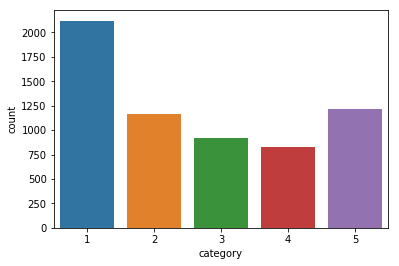

In [10]:
import seaborn as sns
sns.countplot(train['category'])

In [0]:
y = train['category'].values

In [0]:
# Step 4: Creating a validation set from the training data.

X_train, X_test, y_train, y_test_class = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test_class)

In [14]:
# Step 5: Define the model structure.

# We will create a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer.

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(200,100,3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 4, padding='same', activation='relu'))
model.add(Conv2D(64, 4, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 100, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 50, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 50, 64)       65600     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 50, 64)       65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 25, 64)        0         
__________

In [0]:
# Next, we will compile the model we’ve created.

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

In [18]:
# Step 6: Training the model and validate on validate set


batch_size = 80


results  = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs=40, 
                               steps_per_epoch=X_train.shape[0] // batch_size, 
                               validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
62/62 [==============================] - 30s 490ms/step - loss: 1.7047 - acc: 0.3315 - val_loss: 1.5260 - val_acc: 0.3341
Epoch 2/40
62/62 [==============================] - 23s 372ms/step - loss: 1.4704 - acc: 0.3613 - val_loss: 1.3910 - val_acc: 0.3901
Epoch 3/40
62/62 [==============================] - 23s 367ms/step - loss: 1.3831 - acc: 0.4103 - val_loss: 1.2940 - val_acc: 0.4245
Epoch 4/40
62/62 [==============================] - 23s 368ms/step - loss: 1.3180 - acc: 0.4365 - val_loss: 1.2558 - val_acc: 0.4357
Epoch 5/40
62/62 [==============================] - 23s 370ms/step - loss: 1.2860 - acc: 0.4488 - val_loss: 1.2398 - val_acc: 0.4508
Epoch 6/40
62/62 [==============================] - 23s 368ms/step - loss: 1.2536 - acc: 0.4694 - val_loss: 1.1500 - val_acc: 0.4956
Epoch 7/40
62/62 [==============================] - 23s 366ms/step - loss: 1.1940 - acc: 0.5004 - val_loss: 1.0742 - val_acc: 0.5396
Epoch 8/40
62/62 [===

In [19]:
type(model.history)

keras.callbacks.History

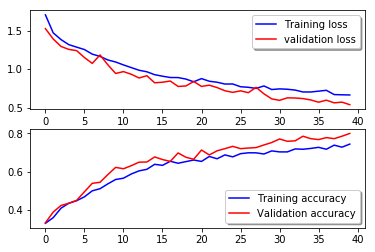

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(results.history['loss'], color='b', label="Training loss")
ax[0].plot(results.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(results.history['acc'], color='b', label="Training accuracy")
ax[1].plot(results.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
# Step 7: Find Accuracy
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.5374, final accuracy: 0.7994


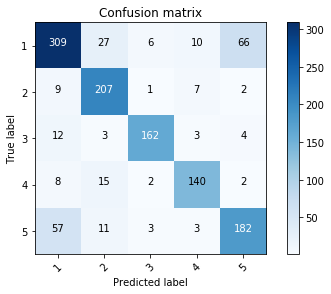

In [22]:
# Look at confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes , rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict_classes(X_test) + 1

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_class, Y_pred) 
confusion_mtx
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(1,6))

In [0]:
# making predictions
y_test_pred = model.predict_classes(X_test) + 1

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_test_pred))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_class, y_test_pred)
print('Accuracy: %f' % accuracy)

[[309  27   6  10  66]
 [  9 207   1   7   2]
 [ 12   3 162   3   4]
 [  8  15   2 140   2]
 [ 57  11   3   3 182]]
Accuracy: 0.799361


In [0]:
y_test_pred = model.predict_classes(test_images) + 1
# select the indix with the maximum probability
# y_test_pred = np.argmax(y_test_pred,axis = 1)
test['category'] = y_test_pred

# output=pd.DataFrame({"image": list(range(1,len(prediction)+1)),
#                          "category": prediction})
test.to_csv("Tundeoutput.csv", index=False, header=True)